<a href="https://colab.research.google.com/github/unihong/MS-AI-School/blob/main/20230720_03_ORB_%EA%B0%9D%EC%B2%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

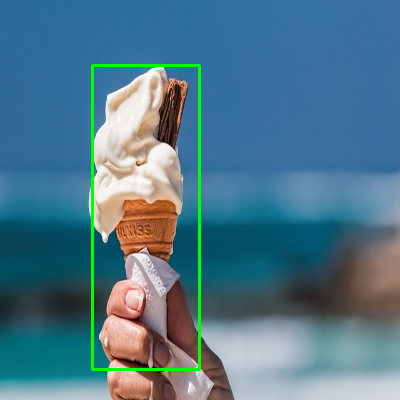

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# ORB 객체 생성
orb = cv2.ORB_create()

# image load
ob_image = cv2.imread("./icecream.jpg")
ob_image = cv2.resize(ob_image, (400, 400))

ob_gray = cv2.cvtColor(ob_image, cv2.COLOR_BGR2GRAY)

# ob image keypoint descriptors
ob_keypoints, ob_descriptors = orb.detectAndCompute(ob_gray, None)

# 대상 이미지
target_img = ob_image.copy()
target_gray_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)

target_keypoints, target_descriptors = orb.detectAndCompute(target_gray_img, None)

matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matchers = matcher.match(ob_descriptors, target_descriptors)

matchers = sorted(matchers, key=lambda x: x.distance)

# 매칭 결과가 일정한 거리 이하인 경우 객체로 인식
if len(matchers) > 10:
    object_found = True

    # 객체 위치 추출
    object_points = [ob_keypoints[m.queryIdx].pt for m in matchers]
    target_points = [target_keypoints[m.trainIdx].pt for m in matchers]

    object_x, object_y, object_w, object_h = cv2.boundingRect(np.float32(object_points))
    target_x, target_y, target_w, target_h = cv2.boundingRect(np.float32(object_points))

    cv2.rectangle(target_img, (object_x, object_y), (object_x + object_w, object_y + object_h), (0, 255, 0), 2)

cv2_imshow(target_img)
